Adnan Ahmed Butt - 101545332
Pavithra Pillappa - 101473936
Keshav Dutt Godiyal - 101471931
Subhashini Nithiyanandhan - 101532057
Shreya Deshmukh - 101558483

1) DEVELOPING A LOGISTIC REGRESSION MODEL FOR CLASSIFYING A CUSTOMER AS A PURCHASER OR NON PURCHASER (PARTITION TRAINING 800 RECORDS, VALIDATION 700 RECORDS AND TEST 500 RECORDS).

USING HEAT MAP

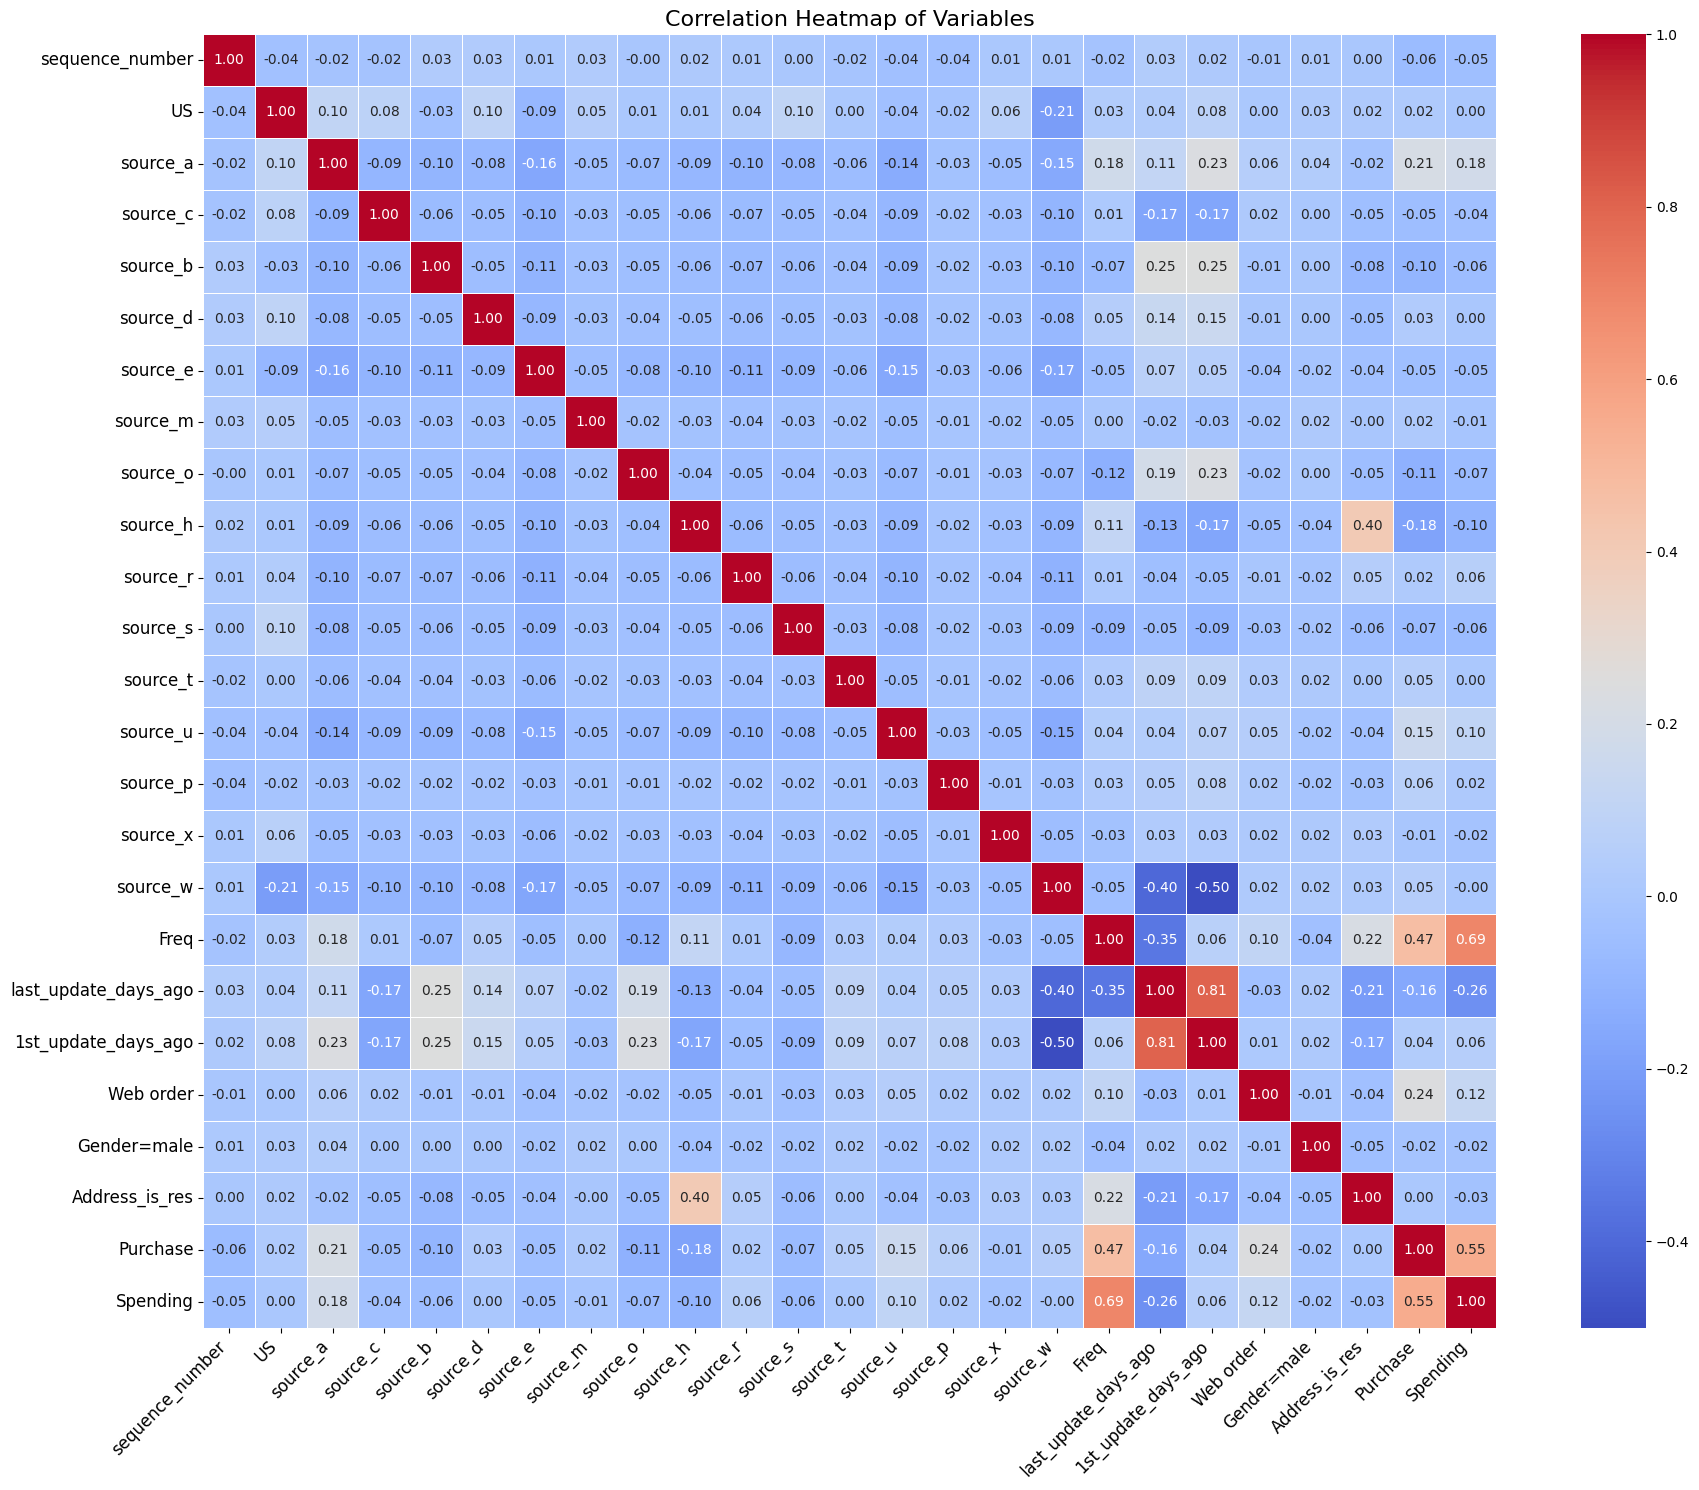

Validation Set Performance:
Accuracy: 0.8014, Precision: 0.7922, Recall: 0.8171, AUC-ROC: 0.9050

Test Set Performance:
Accuracy: 0.7960, Precision: 0.8217, Recall: 0.7560, AUC-ROC: 0.8984


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score

# Load dataset
file_path = "/content/Tayko.csv"
df = pd.read_csv(file_path)

# Compute the correlation matrix
corr_matrix = df.corr()


# Set up the matplotlib figure
plt.figure(figsize=(19, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", cbar=True, square=True)


plt.title("Correlation Heatmap of Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


plt.show()


# Drop non-predictive columns
df_clean = df.drop(columns=["sequence_number", "Spending"])  # 'sequence_number' is an index, 'Spending' is outcome-related

# Define target variable and features
X = df_clean.drop(columns=["Purchase"])  # Features
y = df_clean["Purchase"]  # Target

# Handle multicollinearity: Drop highly correlated variables based on heatmap analysis
columns_to_drop = ["source_c", "source_b", "source_d", "source_e", "US"]
X_filtered = X.drop(columns=columns_to_drop)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered, y, train_size=800, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=700, random_state=42, stratify=y_temp)

# Initialize and train the logistic regression model
log_reg_filtered = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
log_reg_filtered.fit(X_train, y_train)

# Predictions
y_val_pred_filtered = log_reg_filtered.predict(X_val)
y_val_prob_filtered = log_reg_filtered.predict_proba(X_val)[:, 1]
y_test_pred_filtered = log_reg_filtered.predict(X_test)
y_test_prob_filtered = log_reg_filtered.predict_proba(X_test)[:, 1]

# Compute performance metrics for validation set
accuracy_val = accuracy_score(y_val, y_val_pred_filtered)
precision_val = precision_score(y_val, y_val_pred_filtered)
recall_val = recall_score(y_val, y_val_pred_filtered)
roc_auc_val = roc_auc_score(y_val, y_val_prob_filtered)

# Compute performance metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred_filtered)
precision_test = precision_score(y_test, y_test_pred_filtered)
recall_test = recall_score(y_test, y_test_pred_filtered)
roc_auc_test = roc_auc_score(y_test, y_test_prob_filtered)


print("Validation Set Performance:")
print(f"Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, AUC-ROC: {roc_auc_val:.4f}")

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, AUC-ROC: {roc_auc_test:.4f}")





USING VIF

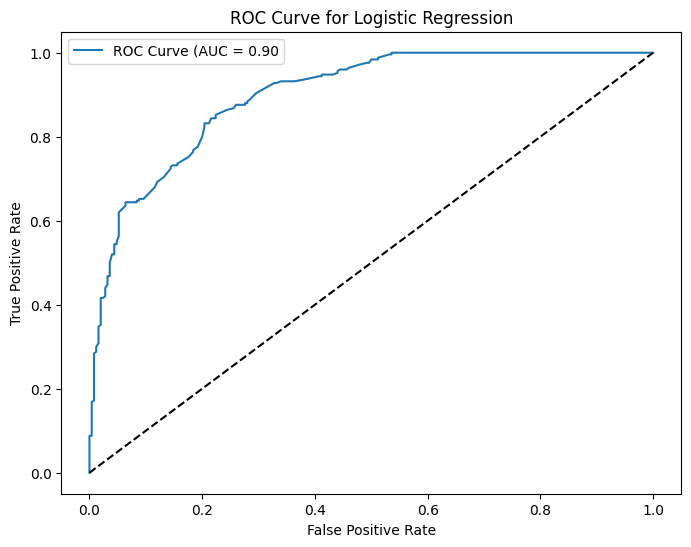

Validation Accuracy: 0.8114
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       350
           1       0.82      0.81      0.81       350

    accuracy                           0.81       700
   macro avg       0.81      0.81      0.81       700
weighted avg       0.81      0.81      0.81       700

Validation AUC Score: 0.9073
---------------------------------------------------
Test Accuracy: 0.7880
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       250
           1       0.82      0.73      0.78       250

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500

Test AUC Score: 0.8987


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv("Tayko.csv")

# Drop unnecessary columns
df = df.drop(columns=["sequence_number", "Spending"])  # Removing identifier and non-predictive column

# Define features and target variable
X = df.drop(columns=["Purchase"])
y = df["Purchase"]


# Split data into training (800), validation (700), and test (500)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=800, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=700, random_state=42, stratify=y_temp)

# Standardize numerical features
scaler = StandardScaler()
num_cols = ["Freq", "last_update_days_ago", "1st_update_days_ago"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Compute VIF for multicollinearity check
X_train_vif = X_train.copy()  # Copy of training data
X_train_vif += np.random.normal(0, 1e-6, X_train_vif.shape)  # Add small noise to avoid divide-by-zero errors

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Remove features with high VIF (Threshold = 5)
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
X_train = X_train.drop(columns=high_vif_features)
X_val = X_val.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)

# Train logistic regression model with L2 regularization
log_model = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)

# Predict probabilities
y_val_prob = log_model.predict_proba(X_val)[:, 1]
y_test_prob = log_model.predict_proba(X_test)[:, 1]

# Predict on validation and test set
y_val_pred = log_model.predict(X_val)
y_test_pred = log_model.predict(X_test)

# Evaluate model performance on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

# Evaluate model performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Compute ROC AUC Score
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Print validation and test results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Classification Report on Validation Set:\n", val_report)
print(f"Validation AUC Score: {val_auc:.4f}")
print("---------------------------------------------------")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report on Test Set:\n", test_report)
print(f"Test AUC Score: {test_auc:.4f}")


2. DEVELOP A MODEL FOR PREDICTING SPEND AMONG PURCHASERS.

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/Tayko.csv"
df = pd.read_csv(file_path)

# Ensure column names are clean (strip whitespace)
df.columns = df.columns.str.strip()

# Filter only purchasers (Purchase = 1)
df_purchasers = df[df['Purchase'] == 1]

# Define target variable (Spending) and predictors
target = "Spending"
predictors = [col for col in df_purchasers.columns if col not in ["Spending", "Purchase"]]

# Split into Training (60%) and Validation (40%)
train, valid = train_test_split(df_purchasers, test_size=0.4, random_state=42)

### Stepwise Regression (Multiple Linear Regression) ###
def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.1):
    """ Perform stepwise regression to select important features """
    included = []
    while True:
        changed = False
        # Forward Step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for col in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [col]])).fit()
            new_pval[col] = model.pvalues[col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True

        # Backward Step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        pvals = model.pvalues.iloc[1:]  # Exclude intercept
        worst_pval = pvals.max()
        if worst_pval > threshold_out:
            worst_feature = pvals.idxmax()
            included.remove(worst_feature)
            changed = True

        if not changed:
            break
    return included

# Apply Stepwise Regression
X_train = train[predictors]
y_train = train[target]

selected_features = stepwise_selection(X_train, y_train)

# Fit Final Linear Model
X_train_selected = train[selected_features]
X_valid_selected = valid[selected_features]

model_lr = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
y_pred_lr = model_lr.predict(sm.add_constant(X_valid_selected))

# Evaluate Linear Model
rmse_lr = np.sqrt(mean_squared_error(valid[target], y_pred_lr))
r2_lr = r2_score(valid[target], y_pred_lr)

### Regression Tree ###
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(train[predictors], train[target])

# Predict & Evaluate
y_pred_tree = tree_model.predict(valid[predictors])

rmse_tree = np.sqrt(mean_squared_error(valid[target], y_pred_tree))
r2_tree = r2_score(valid[target], y_pred_tree)

# Display results
print("\n=== Model Performance ===")
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Regression Tree - RMSE: {rmse_tree:.2f}, R²: {r2_tree:.2f}")

print("\n=== Selected Features for Linear Regression ===")
print(selected_features)

# Choose best model
if r2_lr > r2_tree:
    print("\nBest Model: Linear Regression (Stepwise Selection)")
else:
    print("\nBest Model: Regression Tree")


=== Model Performance ===
Linear Regression - RMSE: 173.98, R²: 0.47
Regression Tree - RMSE: 185.78, R²: 0.39

=== Selected Features for Linear Regression ===
['Freq', 'Address_is_res', 'source_w', 'source_a', 'source_u']

Best Model: Linear Regression (Stepwise Selection)
